# Homework project for the "Differential Equations" course module

1. Solve the wave equation `dt^2 u(t,x) = dx^2 u(t,x)` numerically. Use a `1+1`-dimensional domain, and use Dirichlet boundary conditions `u(t,-L) = u(t,+L) = 0`. Use the spatial domain bounds `[-1; +1]`, and use the Gaussian-like function `f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2)` as initial condition. Use `L=1, A=1, W=0.2` as parameters. Evolve from `t=0` to `t=4L`, i.e. for two crossing times. Plot the result.

In [1]:
]add CairoMakie

    Updating registry at `C:\Users\igiannakoudi\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\igiannakoudi\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\igiannakoudi\.julia\environments\v1.8\Manifest.toml`


In [89]:
# Define two grid functions `t`, `x` holding the coordinates
function coords(nn, ni, dt, dx)
    t = [n *dt for i in 0:ni, n in 0:nn]
    x = [-1 + i * dx for i in 0:ni, n in 0:nn]
    return t, x
end

coords (generic function with 1 method)

In [90]:
A= 1
W= 0.2
L=1;

In [91]:
dt = 0.04
dx=0.04
nn=4/dt
ni=2/dt
t, x = coords(nn, ni, dt, dx);

In [92]:
# Define initial conditions for the first two time steps and all x's as f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2) , with L=1, A=1, W=0.2 .
function gaussian(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = A*exp.(-1*sin.(2*π*(x[i,n]-t[i,n])).^2/(2*W^2))
    end
    return u
end

gaussian (generic function with 1 method)

In [93]:
u = gaussian(t,x) ;

In [94]:
using CairoMakie

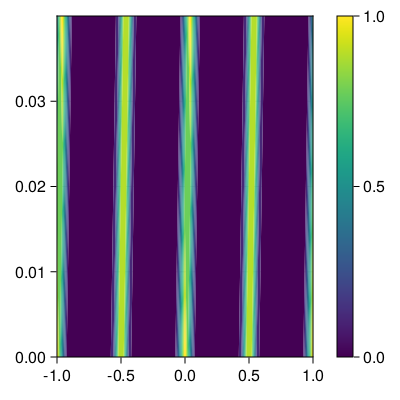

In [95]:
# we plot the inital conditions for all x's and t only for the first two time steps, hence only u[:,1:2], all the rest are zero
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x[:,1:2]), vec(t[:,1:2]), vec(u[:,1:2]))
Colorbar(fig[1, 2])
fig

In [96]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / (dx)^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * (dt)^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [97]:
# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [98]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [99]:
evolve!(u, dt, dx)

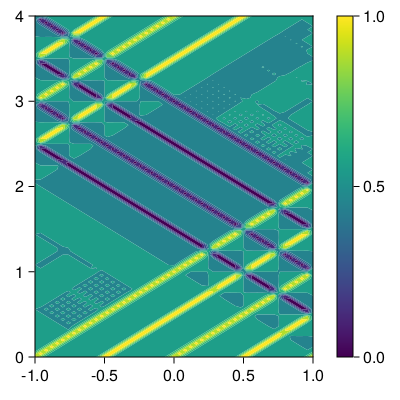

In [100]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
Colorbar(fig[1, 2])
fig

In [14]:
# Question: If we wanted our boundary conditions to agree with the initial conditions shouldn't they be u[-1,0]=u[1,4]=1 ?

2. Vary the time step size `dt`. If you choose `dt` too large, the discrete system will be unstable. What is the stability limit? Why does this happen? How could you avoid this limit?

In [15]:
dt = 0.042
dx=0.04
nn=4/dt
ni=2/dt
t, x = coords(nn, ni, dt, dx);

In [16]:
# Define initial conditions for the first two time steps and all x's as f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2) , with L=1, A=1, W=0.2 .
function gaussian(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = A*exp.(-1*sin.(2*π*(x[i,n]-t[i,n])).^2/(2*W^2))
    end
    return u
end

gaussian (generic function with 1 method)

In [17]:
u = gaussian(t,x) ;

In [18]:
using CairoMakie

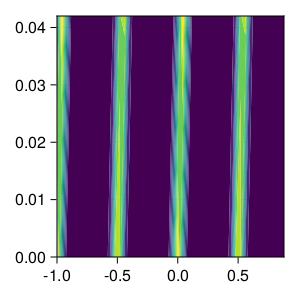

In [19]:
# we plot the inital conditions for all x's and t only for the first two time steps, hence only u[:,1:2], all the rest are zero
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x[:,1:2]), vec(t[:,1:2]), vec(u[:,1:2]))
Colorbar(fig[1, 2])
fig

In [20]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / (dx)^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * (dt)^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [21]:
# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [22]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [23]:
evolve!(u, dt, dx)

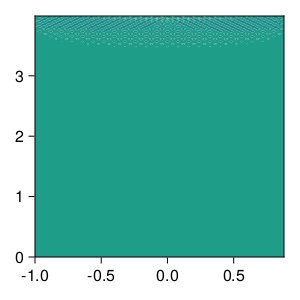

In [24]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
Colorbar(fig[1, 2])
fig

Even with that very small change the solution that we get does not make sense, so the method is not stable. However, let's see what happens when we make both `dt` and `dx` larger but remain equal.

In [25]:
dt = 0.2
dx=0.2
nn=4/dt
ni=2/dt
t, x = coords(nn, ni, dt, dx);

In [26]:
# Define initial conditions for the first two time steps and all x's as f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2) , with L=1, A=1, W=0.2 .
function gaussian(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = A*exp.(-1*sin.(2*π*(x[i,n]-t[i,n])).^2/(2*W^2))
    end
    return u
end

gaussian (generic function with 1 method)

In [27]:
u = gaussian(t,x) ;

In [28]:
using CairoMakie

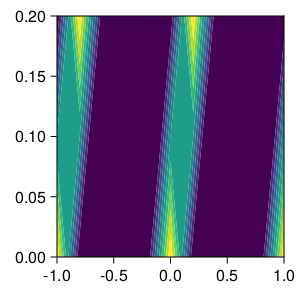

In [29]:
# we plot the inital conditions for all x's and t only for the first two time steps, hence only u[:,1:2], all the rest are zero
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x[:,1:2]), vec(t[:,1:2]), vec(u[:,1:2]))
Colorbar(fig[1, 2])
fig

In [30]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / (dx)^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * (dt)^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [31]:
# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [32]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [33]:
evolve!(u, dt, dx)

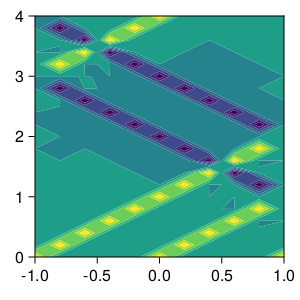

In [34]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
Colorbar(fig[1, 2])
fig

In contrast with before, if we change the intervals `dt` and `dx` simultaneously and make them larger we get a solution, but of course it lacks accuracy. So, the limit of large `dx` and `dt` not getting a solution is when `dt` is so large that either the initial conditions don't make sense, i.e. `dt` is larger than 4L or `dt` is ~half of the time interval 4L so the initial conditions provide the whole solution. In these cases `dx` changes accordingly with `dx` because as we saw before even small difference between the grid slicing of the time and space directions make the solution unstable.

So, as long as we stick to equal `dx` and `dt` we don't arrive to unstable solution, we are only losing accuracy.

3. The energy density of a scalar wave is `epsilon(t,x) = 1/2 ((d/dt u(t,x))^2 + ((d/dx u(t,x))^2)`. Calculate the energy density as a function of space and time for your solution. Plot the result.

Now, we have the values of u(t,x) for every point in our grid, i.e. we know u(n,i) for n in 1:nn and i in 1:ni. 
To calculate the derivative we will use Taylor expansion:
$$
f(x-h)=f(x)-hf'(x) \Rightarrow 
$$

$$
f'(x)=\frac{f(x)-f(x-h)}{h}
$$
So, in general, to calculate the time derivative `d/dt u(t,x)` we will use:
$$
\frac{du(n,i)}{dt}=\frac{u(n,i)-u(n-1,i)}{dt}
$$
and for `d/dx u(t,x)` we will use:
$$
\frac{du(n,i)}{dx}=\frac{u(n,i)-u(n,i-1)}{dx}
$$

Except for the boundaries where we will use the forward method:
$$
f'(x)=\frac{f(x+h)-f(x)}{h}
$$


In [35]:
dt = 0.04
dx=0.04
nn=4/dt
ni=2/dt
t, x = coords(nn, ni, dt, dx);

In [36]:
# Define initial conditions for the first two time steps and all x's as f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2) , with L=1, A=1, W=0.2 .
function gaussian(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = A*exp.(-1*sin.(2*π*(x[i,n]-t[i,n])).^2/(2*W^2))
    end
    return u
end

gaussian (generic function with 1 method)

In [37]:
u = gaussian(t,x) ;

In [38]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / (dx)^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * (dt)^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [39]:
# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [40]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [41]:
evolve!(u, dt, dx)

In [48]:
# calculate the derivative with respect to x
function ux(u,dx)
    ni,nn=size(u)
    dux = zeros(ni,nn)
    for n in 1:nn
        for i in 2:ni
            dux[i,n] = (u[i,n]-u[i-1,n])/dx
        end
    dux[1,n]=(u[2,n]-u[1,n])/dt
    end
    return dux
end

ux (generic function with 1 method)

In [49]:
dxu=ux(u,dx);

In [50]:
# calculate the derivative with respect to t
function ut(u,dt)
    ni,nn=size(u)
    dut = zeros(ni,nn)
    for i in 1:ni
        for n in 2:nn
            dut[i,n] = (u[i,n]-u[i,n-1])/dt
        end
    dut[i,1]=(u[i,2]-u[i,1])/dt
    end
    return dut
end

ut (generic function with 1 method)

In [51]:
dtu=ut(u,dt);

In [54]:
function epsilon(dux,dut)
     return epsilon = 1/2 * (dux.^2 .+ dut.^2) 
end

epsilon (generic function with 1 method)

In [57]:
e=epsilon(dxu,dtu);

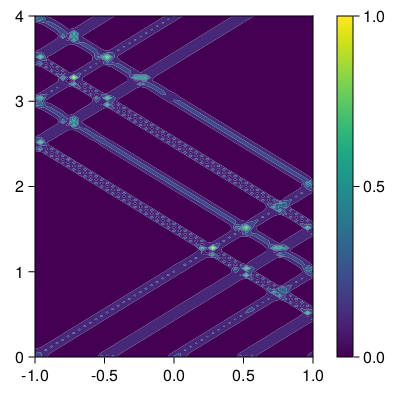

In [88]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(e))
Colorbar(fig[1, 2])
fig

4. To calculate the total energy `E(t)` as a function of time, you need to integrate it over space. One way to do so is using the function below. Calculate and show the total energy `E(t)` as a function of time. How well is the energy conserved? How does this depend on the grid spacings `dx` and `dt`?

In [59]:
# Integrate `epsilon` over space
function integrate(epsilon, n, dx)
    ni, nt = size(epsilon)
    # The boundary points are special; they have a weight of 1/2.
    # There are `ni` points overall, and the grid spacing is `dx = 2L/(ni-1)`.
    # Integrating the constant function `epsilon=1` thus gives exactly `2L`.
    E = epsilon[1, n] / 2
    for i in 2:ni-1
        E += epsilon[i, n]
    end
    E += epsilon[ni, n] / 2
    # Scale by the grid spacing
    E *= dx
    return E
end

integrate (generic function with 1 method)

The function `integrate` integrates epsilon over space for a time instance `n`, we need to calculate this integral for each time step we have in our grid to have the energy as a function of time, `E(t)`.

In [70]:
function E(eps,dx)
ni, nn = size(eps)
Energy = zeros(nn)
    for n in 1:nn
    Energy[n] = integrate(eps, n, dx)
    end
return Energy
end

E (generic function with 2 methods)

In [73]:
energy=E(e,dx);

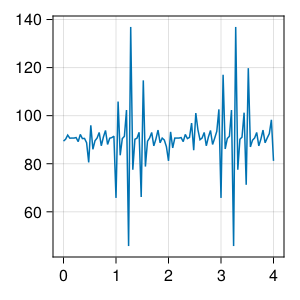

In [74]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
lines!(t[1,1:end], energy)
fig

As we can see from the plot above, energy does not seem to be conserved, we can see deviations from the mean value, which are significant. What is interesting is that the big fluctuations are located in the times that the function hits the boundaries and gets reflected from them and when two "rays" are crossing one another. 

So, we begin with a function of (x-t), a wave, which is propagating in space and time, we can see that when the wave hits the right boundary it is losing energy (we have a drop of energy first on the peaks around 1), but a slightly after the reflection it crosses another ray and they interfere so the energy changes momentarily. As the rays continue to propagate in space and time they hit the left boundary and they gain energy, instead of losing, which I would assume is due to the fact that we set same boundary conditions in the two boundaries, so it's like they gained the energy they lost in the previous reflection, they again cross one another and the energy changes, and so on if we saw in later times as well. 

So all in all, the energy is kind of conserved in the sense that in total as much as it's lost in one reflection is gained back, but we cannot observe conservation of energy from time to time, which makes sense since we are calculating derivatives at first or second order using finite differences method.

If we change the grid spacings `dt` and `dx` we expect the fluctuations to occur with the same intensity around these times as well, but as we can see comparing the solution plots from the first question, the width of the rays, or the 'location' of the energy is wider leading to peakd with more width in the E(t) diagram. On the other hand, we expect the peaks to get sharper and clearer as we increase the resolution.

Let us demonstrate that using larger grid spacings.

In [118]:
dt = 0.1
dx=0.1
nn=4/dt
ni=2/dt
t, x = coords(nn, ni, dt, dx);

In [119]:
# Define initial conditions for the first two time steps and all x's as f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2) , with L=1, A=1, W=0.2 .
function gaussian(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = A*exp.(-1*sin.(2*π*(x[i,n]-t[i,n])).^2/(2*W^2))
    end
    return u
end

gaussian (generic function with 1 method)

In [120]:
u = gaussian(t,x) ;

In [121]:
# Find the solution at one interior point `u[i,n]`
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
    # Finite difference for second derivative in x direction at point [i,n-1]
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1]) / (dx)^2
    # Time derivative
    # utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n]) / dt^2
    # Wave equation
    # utt = uxx
    # Solve for u[i,n]
    u[i,n] = uxx * (dt)^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [122]:
# Find the solution for one point in time `n`
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    # Apply boundary condition at left boundary
    u[1,n] = 0
    # Evolve interior
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    # Apply boundary condition at right boundary
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [123]:
# Find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
    # Loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [124]:
evolve!(u, dt, dx)

In [125]:
# calculate the derivative with respect to x
function ux(u,dx)
    ni,nn=size(u)
    dux = zeros(ni,nn)
    for n in 1:nn
        for i in 2:ni
            dux[i,n] = (u[i,n]-u[i-1,n])/dx
        end
    dux[1,n]=(u[2,n]-u[1,n])/dt
    end
    return dux
end

ux (generic function with 1 method)

In [126]:
dxu=ux(u,dx);

In [127]:
# calculate the derivative with respect to t
function ut(u,dt)
    ni,nn=size(u)
    dut = zeros(ni,nn)
    for i in 1:ni
        for n in 2:nn
            dut[i,n] = (u[i,n]-u[i,n-1])/dt
        end
    dut[i,1]=(u[i,2]-u[i,1])/dt
    end
    return dut
end

ut (generic function with 1 method)

In [128]:
dtu=ut(u,dt);

In [129]:
function epsilon(dux,dut)
     return epsilon = 1/2 * (dux.^2 .+ dut.^2) 
end

epsilon (generic function with 1 method)

In [130]:
e=epsilon(dxu,dtu);

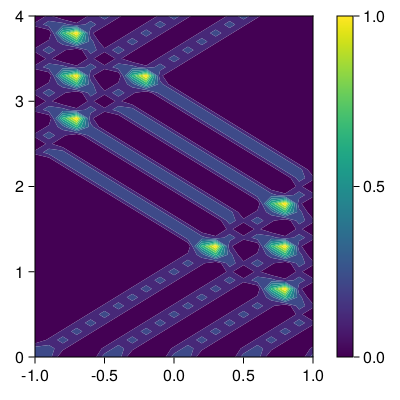

In [131]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(e))
Colorbar(fig[1, 2])
fig

In [132]:
function E(eps,dx)
ni, nn = size(eps)
Energy = zeros(nn)
    for n in 1:nn
    Energy[n] = integrate(eps, n, dx)
    end
return Energy
end

E (generic function with 2 methods)

In [133]:
energy=E(e,dx);

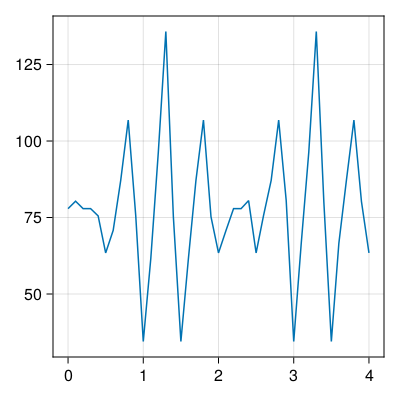

In [134]:
fig = Figure(resolution = (400, 400))
ax = Axis(fig[1, 1])
lines!(t[1,1:end], energy)
fig

Indeed the peaks are wider. Also, the values of the energy are smaller.

I want to thank Sercan who kindly helped me with some questions I had!!!